In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

accesscm2_pr_file = '/Volumes/Seagate Backup Plus Drive/data_tut/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'

In [3]:
dset = xr.open_dataset(accesscm2_pr_file)

In [4]:
print(dset)

<xarray.Dataset>
Dimensions:    (time: 60, bnds: 2, lon: 192, lat: 144)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    cmor_version:           3.4.0
    tracking_i

In [5]:
print(dset['pr'])

<xarray.DataArray 'pr' (time: 60, lat: 144, lon: 192)>
[1658880 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


In [6]:
print(dset['time'])

<xarray.DataArray 'time' (time: 60)>
array(['2010-01-16T12:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-16T12:00:00.000000000', '2010-04-16T00:00:00.000000000',
       '2010-05-16T12:00:00.000000000', '2010-06-16T00:00:00.000000000',
       '2010-07-16T12:00:00.000000000', '2010-08-16T12:00:00.000000000',
       '2010-09-16T00:00:00.000000000', '2010-10-16T12:00:00.000000000',
       '2010-11-16T00:00:00.000000000', '2010-12-16T12:00:00.000000000',
       '2011-01-16T12:00:00.000000000', '2011-02-15T00:00:00.000000000',
       '2011-03-16T12:00:00.000000000', '2011-04-16T00:00:00.000000000',
       '2011-05-16T12:00:00.000000000', '2011-06-16T00:00:00.000000000',
       '2011-07-16T12:00:00.000000000', '2011-08-16T12:00:00.000000000',
       '2011-09-16T00:00:00.000000000', '2011-10-16T12:00:00.000000000',
       '2011-11-16T00:00:00.000000000', '2011-12-16T12:00:00.000000000',
       '2012-01-16T12:00:00.000000000', '2012-02-15T12:00:00.000000000',
       '2012-0

In [7]:
clim = dset['pr'].mean('time', keep_attrs=True)

In [8]:
print(clim)

<xarray.DataArray 'pr' (lat: 144, lon: 192)>
array([[1.8461452e-06, 1.9054805e-06, 1.9228980e-06, ..., 1.9869783e-06,
        2.0026005e-06, 1.9683730e-06],
       [1.9064508e-06, 1.9021350e-06, 1.8931637e-06, ..., 1.9433096e-06,
        1.9182237e-06, 1.9072245e-06],
       [2.1003202e-06, 2.0477617e-06, 2.0348527e-06, ..., 2.2391034e-06,
        2.1970161e-06, 2.1641599e-06],
       ...,
       [7.5109556e-06, 7.4777777e-06, 7.4689174e-06, ..., 7.3359679e-06,
        7.3987890e-06, 7.3978440e-06],
       [7.1837171e-06, 7.1722038e-06, 7.1926393e-06, ..., 7.1552149e-06,
        7.1576678e-06, 7.1592167e-06],
       [7.0353467e-06, 7.0403985e-06, 7.0326828e-06, ..., 7.0392648e-06,
        7.0387587e-06, 7.0304386e-06]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation


In [9]:
clim.data

array([[1.8461452e-06, 1.9054805e-06, 1.9228980e-06, ..., 1.9869783e-06,
        2.0026005e-06, 1.9683730e-06],
       [1.9064508e-06, 1.9021350e-06, 1.8931637e-06, ..., 1.9433096e-06,
        1.9182237e-06, 1.9072245e-06],
       [2.1003202e-06, 2.0477617e-06, 2.0348527e-06, ..., 2.2391034e-06,
        2.1970161e-06, 2.1641599e-06],
       ...,
       [7.5109556e-06, 7.4777777e-06, 7.4689174e-06, ..., 7.3359679e-06,
        7.3987890e-06, 7.3978440e-06],
       [7.1837171e-06, 7.1722038e-06, 7.1926393e-06, ..., 7.1552149e-06,
        7.1576678e-06, 7.1592167e-06],
       [7.0353467e-06, 7.0403985e-06, 7.0326828e-06, ..., 7.0392648e-06,
        7.0387587e-06, 7.0304386e-06]], dtype=float32)

In [10]:
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day' 

print(clim)


<xarray.DataArray 'pr' (lat: 144, lon: 192)>
array([[0.15950695, 0.16463352, 0.16613839, ..., 0.17167493, 0.17302468,
        0.17006743],
       [0.16471735, 0.16434446, 0.16356934, ..., 0.16790195, 0.16573453,
        0.1647842 ],
       [0.18146767, 0.17692661, 0.17581128, ..., 0.19345854, 0.18982219,
        0.18698342],
       ...,
       [0.64894656, 0.64607999, 0.64531446, ..., 0.63382763, 0.63925537,
        0.63917372],
       [0.62067316, 0.61967841, 0.62144403, ..., 0.61821057, 0.6184225 ,
        0.61855632],
       [0.60785395, 0.60829043, 0.60762379, ..., 0.60819248, 0.60814875,
        0.6074299 ]])
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          mm/day
    comment:        includes both liquid and solid phases
    cell_methods:   area: time: mean
 

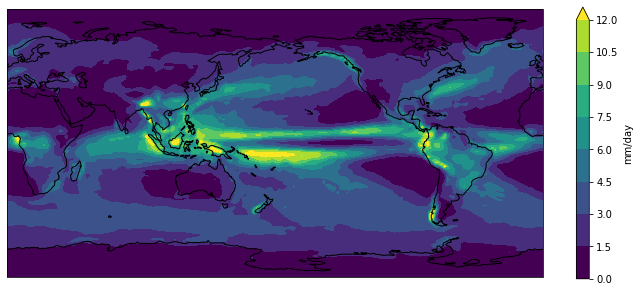

In [11]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units})
ax.coastlines()

plt.show()


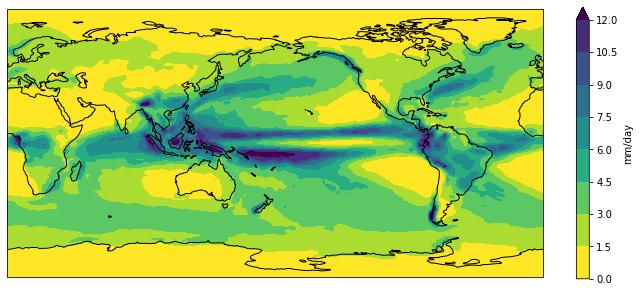

In [12]:



dset_2 = xr.open_dataset(accesscm2_pr_file)

clim = dset_2['pr'].mean('time', keep_attrs=True)

clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap='viridis_r')
ax.coastlines()
plt.show()


In [13]:
print(dset['pr'].attrs)

{'standard_name': 'precipitation_flux', 'long_name': 'Precipitation', 'units': 'kg m-2 s-1', 'comment': 'includes both liquid and solid phases', 'cell_methods': 'area: time: mean', 'cell_measures': 'area: areacella'}


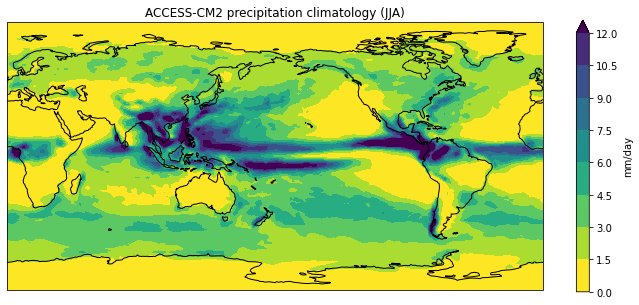

In [16]:
### full code


import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
#import cmocean
accesscm2_pr_file = '/Volumes/Seagate Backup Plus Drive/data_tut/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'

dset_3 = xr.open_dataset(accesscm2_pr_file)

clim_2 = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

clim_2.data = clim_2.data * 86400
clim_2.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim_2.sel(season='JJA').plot.contourf(ax=ax,
                                     levels=np.arange(0, 13.5, 1.5),
                                     extend='max',
                                     transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'label': clim.units},
                                     cmap='viridis_r')
ax.coastlines()

model = dset.attrs['source_id']
title = f'{model} precipitation climatology (JJA)'
plt.title(title)

plt.show()
